In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

this_repo_url = 'http://github.com/lexfridman/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

# 載入所需資料
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def preprocess_images(imgs):
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

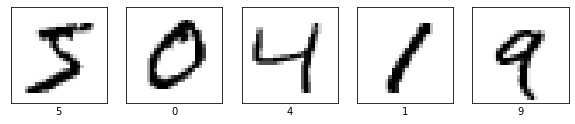

In [ ]:
# 從測試資料顯示前5個影像
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# 藉由池化尋找最佳特徵
model.add(MaxPooling2D(pool_size=(2, 2)))
# improve convergence
model.add(Dropout(0.25))
# flatten將多維轉成一維輸出
model.add(Flatten())

model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [ ]:
# train model

model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 利用訓練資料建立model

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.1938 - accuracy: 0.9414
Epoch 2/5
1875/1875 [==============================] - 160s 86ms/step - loss: 0.0791 - accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0605 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0493 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0411 - accuracy: 0.9879


In [ ]:
# evaluate accuracy
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Testing by B10723052 陳映蓉')

(10000, 28, 28, 1)
313/313 [==============================] - 6s 20ms/step - loss: 0.0272 - accuracy: 0.9912
Test accuracy: 0.9911999702453613
Testing by B10723052 陳映蓉
